# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [84]:
df = pd.read_csv("garisKemiskinan.csv")
original_df = df.copy()
df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


- Kolom yang tersedia:
  - provinsi: Nama provinsi.
  - jenis: Jenis kemiskinan (makanan atau non-makanan).
  - daerah: Wilayah (perkotaaan atau perdesaan).
  - tahun: Tahun pengambilan data.
  - periode: Periode pengambilan data (Maret atau September).
  - gk: Nilai garis kemiskinan dalam mata uang.



# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [86]:
df.describe()

,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


In [87]:
# Memeriksa jumlah nilai unik dalam fitur kategorikal
df_kategorikal = df.select_dtypes(include=['object'])
print("\nJumlah nilai unik pada fitur kategorikal:")
print(df_kategorikal.nunique())


Jumlah nilai unik pada fitur kategorikal:
provinsi    35
jenis        3
daerah       3
periode      2
dtype: int64


In [88]:
# Memeriksa jumlah nilai unik dalam fitur kategorikal
df_numerik = df.select_dtypes(include=['float', 'int'])
print("\nJumlah nilai unik pada fitur numerik:")
print(df_numerik.nunique())


Jumlah nilai unik pada fitur numerik:
tahun      10
gk       5191
dtype: int64


In [89]:
df.describe()

,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


#### Visualisasi Distribusi data

<Figure size 1200x600 with 0 Axes>

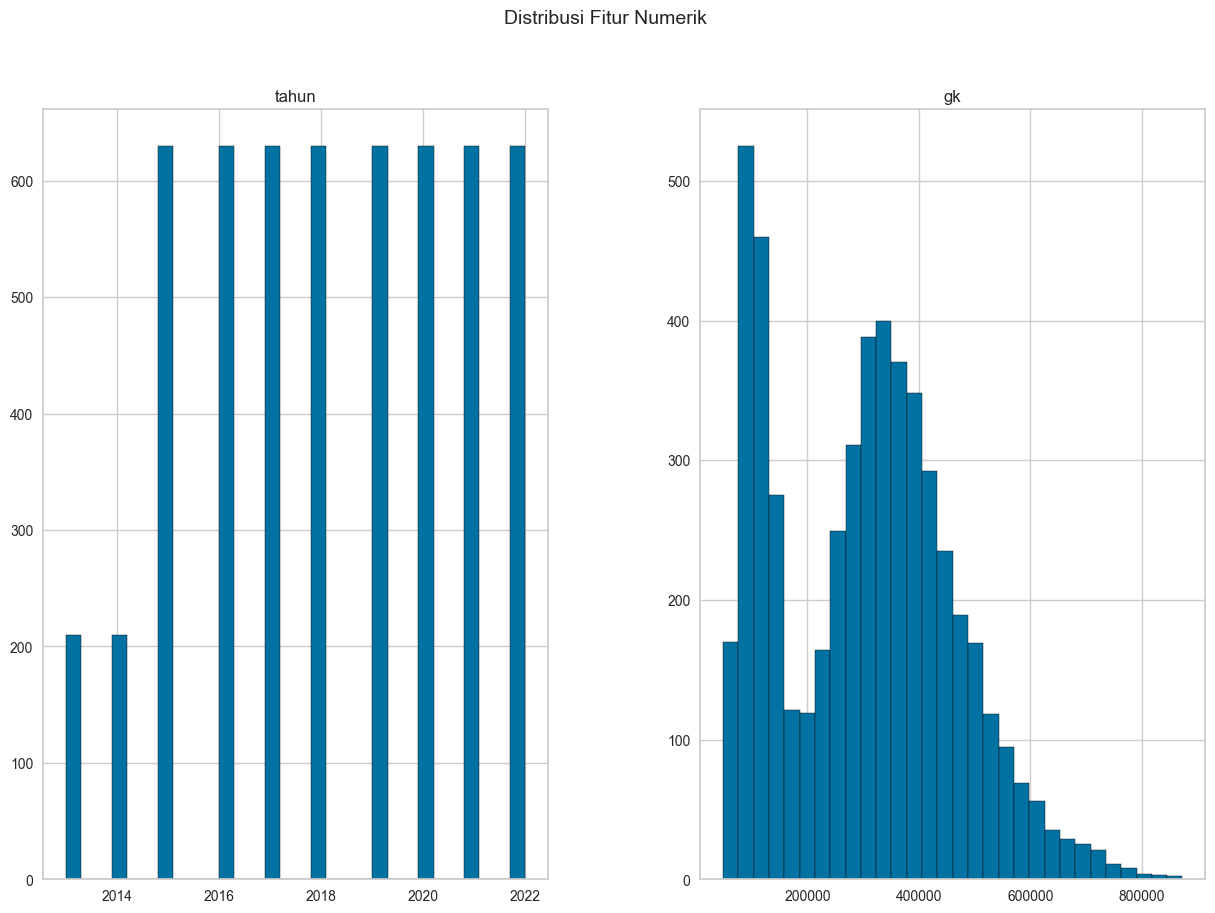

In [90]:
plt.figure(figsize=(12, 6))
df_numerik = df.select_dtypes(include=['int64', 'float64'])
df_numerik.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=14)
plt.show()

- Garis Kemiskinan (gk) bervariasi antar wilayah, beberapa memiliki nilai lebih tinggi.  
- Fitur kategorikal menunjukkan distribusi tidak merata antar kategori.  
- Beberapa fitur skewed, menunjukkan kemungkinan adanya outlier atau pola tertentu.  
- Data menunjukkan potensi subkelompok, relevan untuk analisis clustering.

#### Heatmap Korelasi

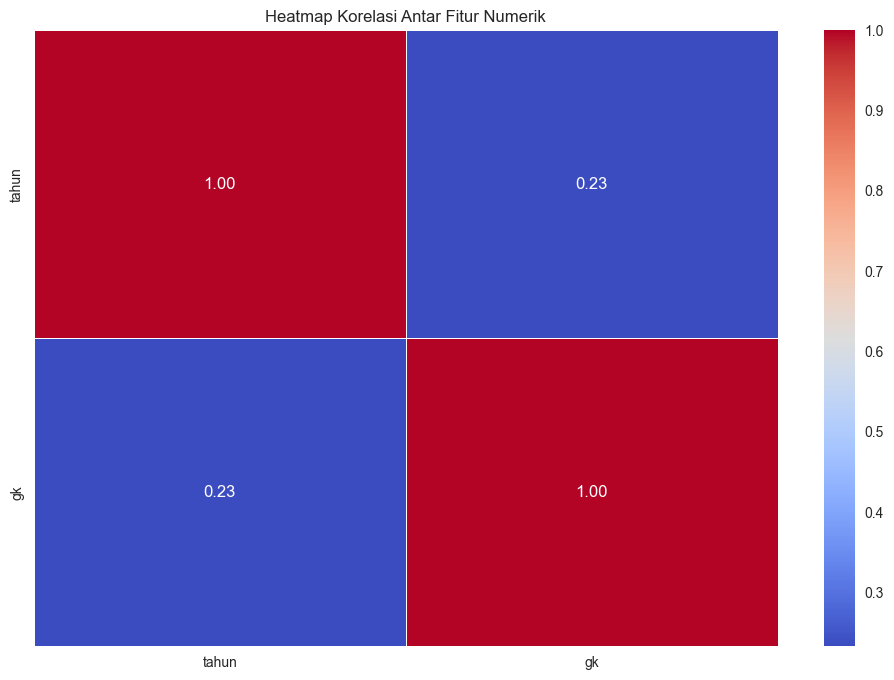

In [91]:
plt.figure(figsize=(12, 8))
corr_matrix = df_numerik.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

#### Deteksi Outlier dengan Boxplot

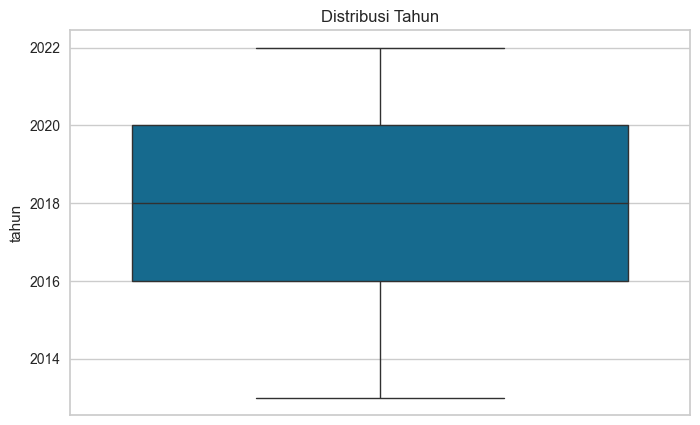

In [92]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_numerik["tahun"])

plt.title("Distribusi Tahun")
plt.show()


- Data tahun memiliki distribusi yang cenderung stabil tanpa outlier signifikan.  
- Tidak ada variasi besar atau anomali dalam penyebaran tahun.  
- Fitur "tahun" kemungkinan hanya sebagai identitas periode dan tidak memengaruhi analisis langsung.

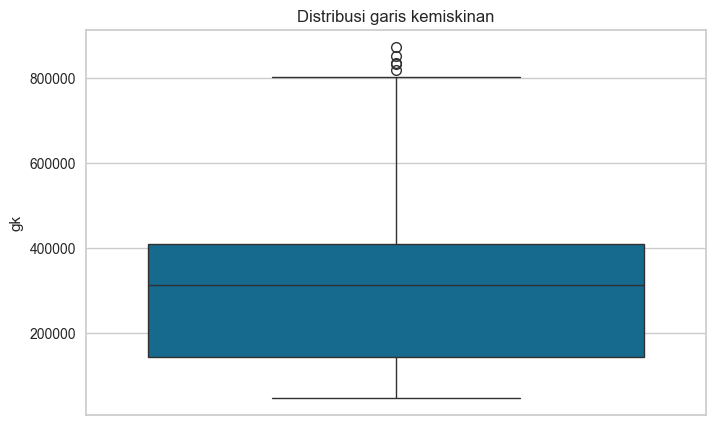

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_numerik['gk'])

plt.title("Distribusi garis kemiskinan")
plt.show()

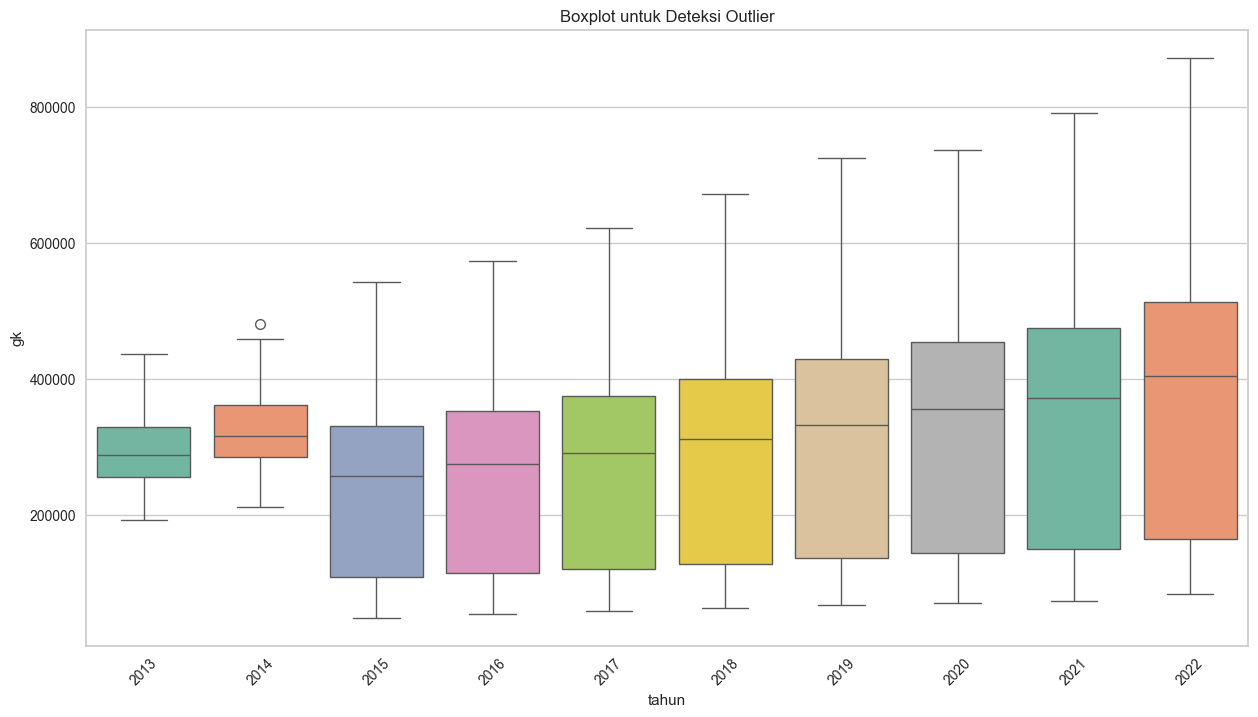

In [94]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="tahun", y="gk", data=df_numerik, hue="tahun", legend=False, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

**Insight:**  
- Tren garis kemiskinan ("gk") terlihat bervariasi setiap tahun, dengan perbedaan distribusi antar tahun.  
- Beberapa tahun menunjukkan adanya outlier, yang bisa menjadi indikasi peristiwa ekonomi tertentu.  
- Variasi antar tahun dapat mencerminkan perubahan ekonomi, kebijakan pemerintah, atau faktor eksternal lainnya.

#### Scatter Plot Hubungan Antar Fitur

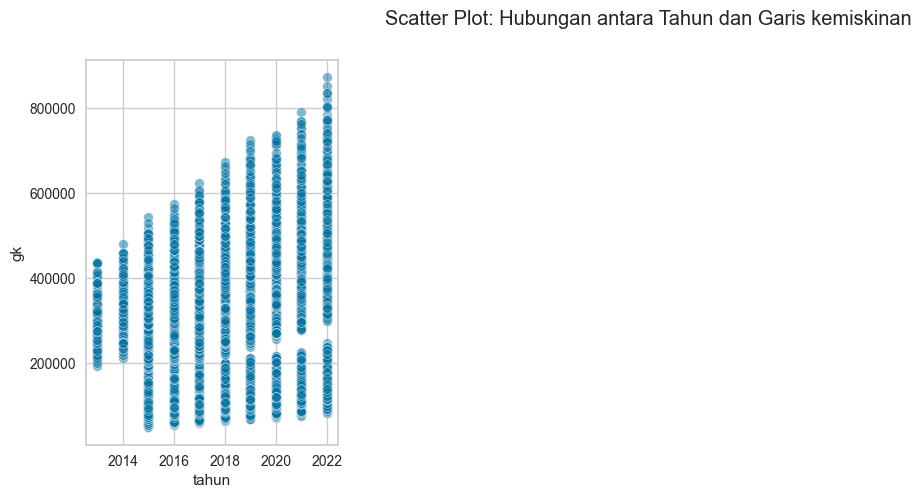

In [95]:
plt.figure(figsize=(15, 5))
features = ['tahun']
for i, feature in enumerate(features, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(x=df[feature], y=df['gk'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('gk')
plt.suptitle("Scatter Plot: Hubungan antara Tahun dan Garis kemiskinan")
plt.show()

**Insight:**  
- Garis kemiskinan ("gk") menunjukkan pola perubahan seiring dengan tahun, tetapi tren spesifik perlu dianalisis lebih lanjut.  
- Tidak ada pola yang sangat jelas, tetapi kemungkinan ada fluktuasi dari tahun ke tahun.  
- Bisa jadi ada faktor eksternal yang memengaruhi perubahan garis kemiskinan setiap tahunnya, seperti kebijakan ekonomi atau kondisi sosial.

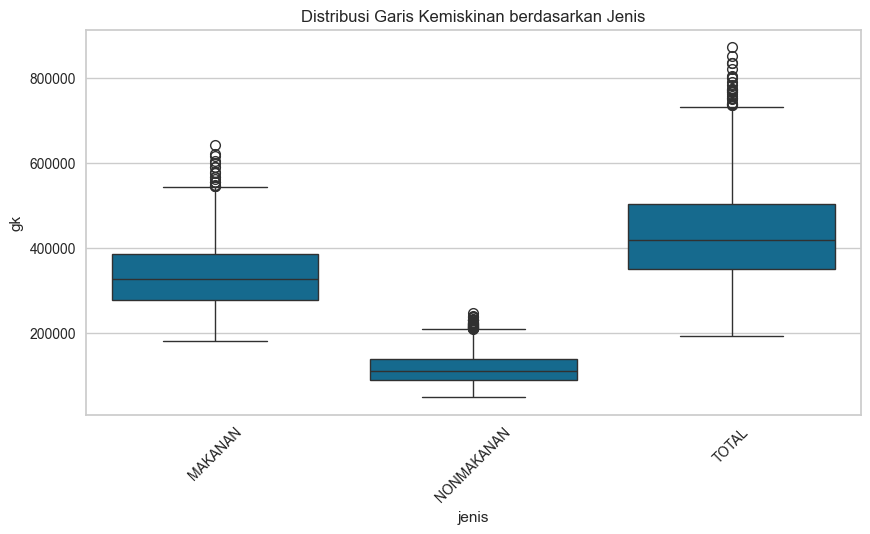

In [96]:
# 6. Distribusi 'gk' Berdasarkan Kategori
plt.figure(figsize=(10, 5))
sns.boxplot(x='jenis', y='gk', data=df)
plt.title("Distribusi Garis Kemiskinan berdasarkan Jenis")
plt.xticks(rotation=45)
plt.show()

##### Insight:
- Nilai 'gk' berbeda signifikan antara kategori 'MAKANAN' dan 'NON MAKANAN'.
- Perlu dianalisis lebih lanjut dampaknya pada model clustering yang akan dibuat.

#### Visualisasi Distribusi Data Kategorikal

In [97]:
print(df.select_dtypes(include=['object']).columns)


Index(['provinsi', 'jenis', 'daerah', 'periode'], dtype='object')


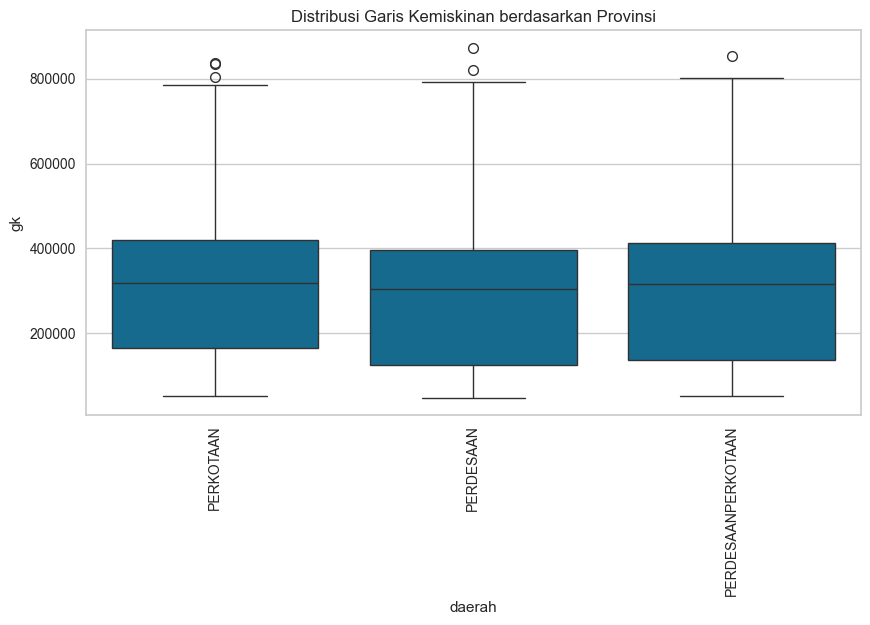

In [98]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='daerah', y='gk', data=df)
plt.title("Distribusi Garis Kemiskinan berdasarkan Provinsi")
plt.xticks(rotation=90)
plt.show()

**Insight:**  
- Garis kemiskinan ("gk") bervariasi antar daerah, menunjukkan adanya perbedaan ekonomi di setiap wilayah.  
- Beberapa daerah memiliki distribusi yang lebih tinggi, mengindikasikan tingkat garis kemiskinan yang lebih besar.  
- Terdapat daerah dengan rentang garis kemiskinan yang lebar, menunjukkan adanya kesenjangan ekonomi dalam provinsi tersebut.  
- Daerah dengan outlier dapat menjadi fokus analisis lebih lanjut untuk memahami faktor penyebabnya.

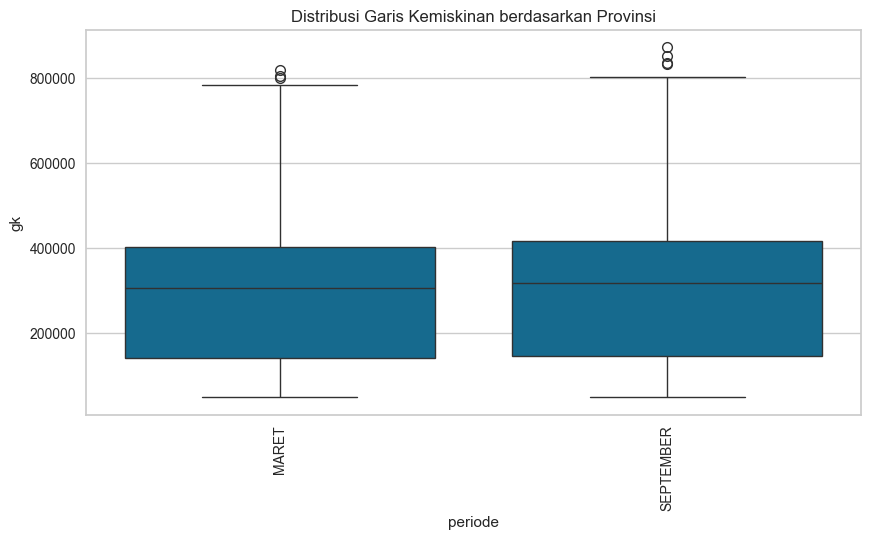

In [99]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='periode', y='gk', data=df)
plt.title("Distribusi Garis Kemiskinan berdasarkan Provinsi")
plt.xticks(rotation=90)
plt.show()

**Insight:**  
- Garis kemiskinan bervariasi di setiap periode.  
- Beberapa periode menunjukkan peningkatan signifikan.  
- Rentang yang lebar dapat mengindikasikan faktor ekonomi eksternal.  
- Outlier menandakan kejadian khusus yang memengaruhi kemiskinan.

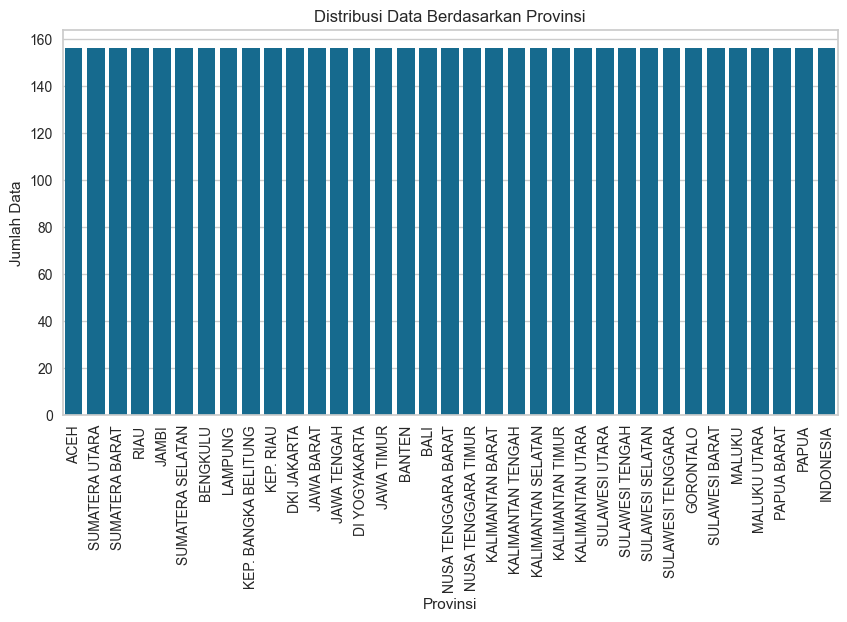

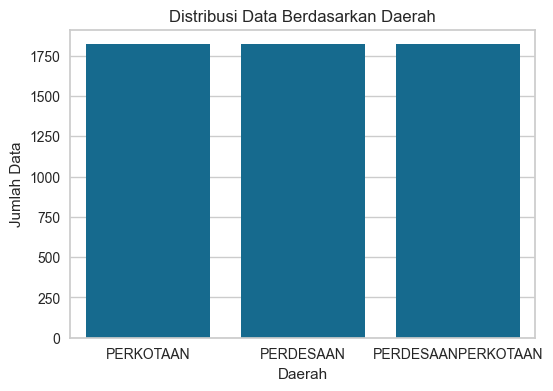

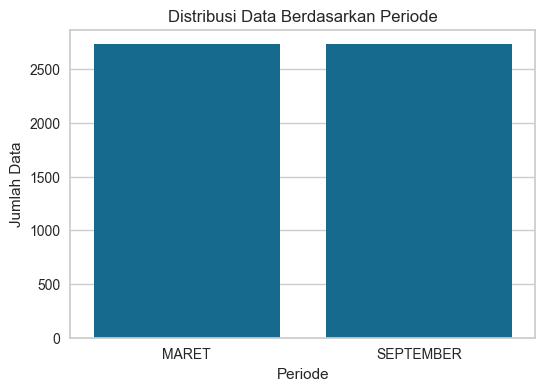

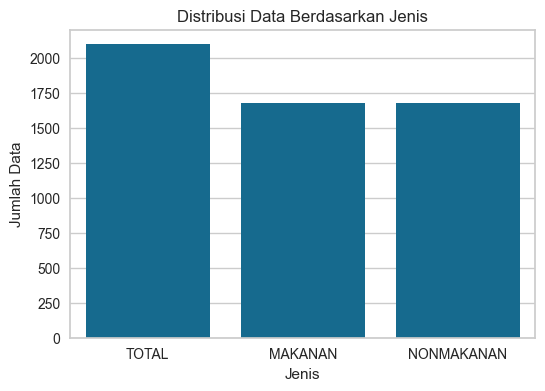

In [100]:
plt.figure(figsize=(10, 5))
sns.countplot(x='provinsi', data=df, order=df['provinsi'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribusi Data Berdasarkan Provinsi")
plt.ylabel("Jumlah Data")
plt.xlabel("Provinsi")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='daerah', data=df, order=df['daerah'].value_counts().index)
plt.title("Distribusi Data Berdasarkan Daerah")
plt.ylabel("Jumlah Data")
plt.xlabel("Daerah")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='periode', data=df, order=df['periode'].value_counts().index)
plt.title("Distribusi Data Berdasarkan Periode")
plt.ylabel("Jumlah Data")
plt.xlabel("Periode")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='jenis', data=df, order=df['jenis'].value_counts().index)
plt.title("Distribusi Data Berdasarkan Jenis")
plt.ylabel("Jumlah Data")
plt.xlabel("Jenis")
plt.show()

##### Insight:
- Sebaran data per provinsi bervariasi, beberapa provinsi memiliki lebih banyak data dibanding yang lain.
- Kategori 'daerah', 'periode', dan 'jenis' juga memiliki distribusi yang berbeda-beda.
- Analisis ini membantu memahami sebaran data sebelum dilakukan pemodelan lebih lanjut.

###### Scatter Plot dan Pairplot untuk Melihat Hubungan Antar Variabel

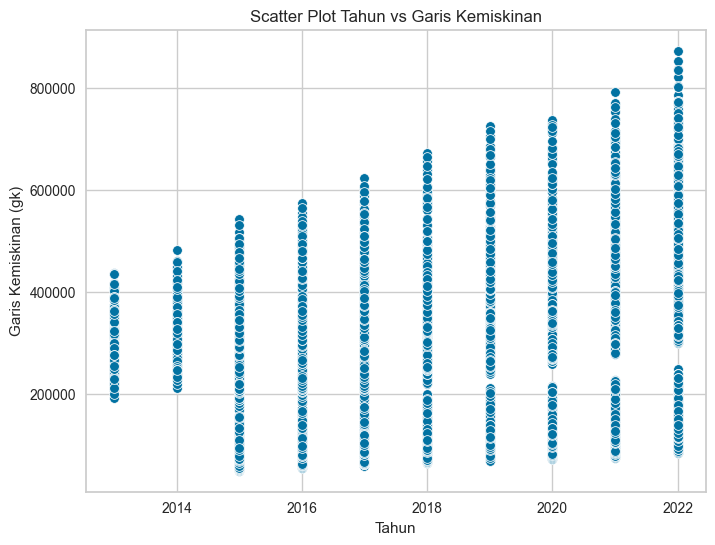

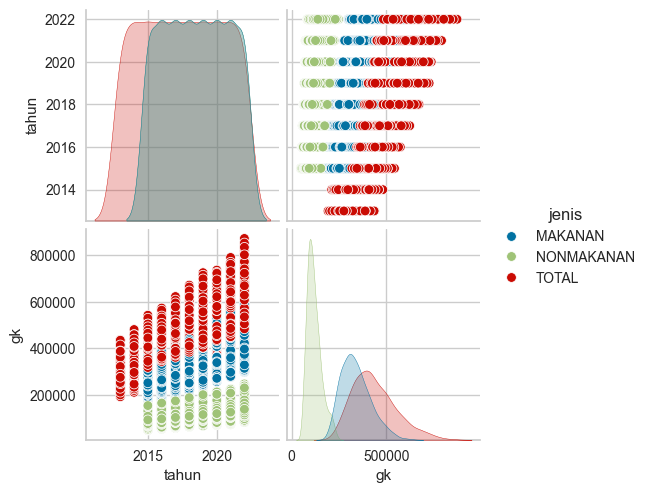

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['tahun'], y=df['gk'])
plt.title("Scatter Plot Tahun vs Garis Kemiskinan")
plt.xlabel("Tahun")
plt.ylabel("Garis Kemiskinan (gk)")
plt.show()

# Pairplot untuk variabel numerik
sns.pairplot(df, hue='jenis', diag_kind='kde')
plt.show()


##### Insight:
- Scatter plot menunjukkan bagaimana 'gk' berubah seiring waktu.
- Pairplot memberikan gambaran lebih mendalam tentang hubungan antar variabel numerik dengan warna berdasarkan kategori 'jenis'.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

#### 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [103]:
df_numerik.mode()

,tahun,gk
0,2015.0,73510.0
1,2016.0,84546.0
2,2017.0,89496.0
3,2018.0,104574.0
4,2019.0,104865.0
...,...,...
65,NaN,680401.0
66,NaN,697638.0
67,NaN,715052.0
68,NaN,738955.0


In [104]:
df.isna().sum()

provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

In [105]:
df=df.dropna()

In [106]:
df.isna().sum()

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64

#### 2.Menghapus Data Duplikat

In [107]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


###### dari pengecekan tidak ditemukan duplikasi data, sehingga kita tidak perlu menghapus data duplikat,sehingga jumlah data tetap 5261 baris.

#### 3. Deteksi dan Penanganan Outlier

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun,5261.0,2018.244250,2.491855,2013.0,2016.0,2018.0,2020.0,2022.0
gk,5261.0,303904.185516,158176.024903,48561.0,144674.0,313294.0,410188.0,872843.0


- tidak ada outlier ekstream

#### 3. Normalisasi atau Standarisasi Fitur

In [109]:
# 5. Normalisasi Fitur Numerik
scaler = MinMaxScaler()
df[['gk']] = scaler.fit_transform(df[['gk']])

- Menggunakan MinMaxScaler akan menormalkan nilai "gk" ke dalam rentang 0 hingga 1

In [110]:
df['gk'].describe()

count    5261.000000
mean        0.309776
std         0.191896
min         0.000000
25%         0.116602
50%         0.321168
75%         0.438718
max         1.000000
Name: gk, dtype: float64

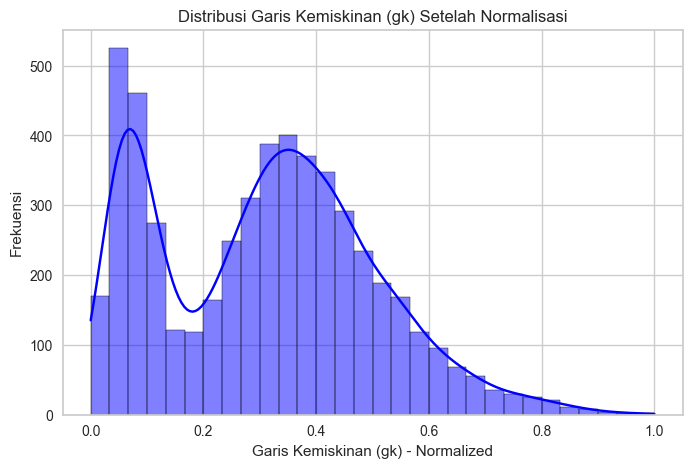

In [111]:
# 8. Visualisasi Distribusi Data
plt.figure(figsize=(8, 5))
sns.histplot(df['gk'], bins=30, kde=True, color='blue')
plt.title("Distribusi Garis Kemiskinan (gk) Setelah Normalisasi")
plt.xlabel("Garis Kemiskinan (gk) - Normalized")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**  
- Distribusi garis kemiskinan setelah normalisasi tetap mempertahankan pola aslinya.  
- Sebagian besar data terkonsentrasi di rentang nilai rendah.  
- Adanya ekor panjang menunjukkan beberapa daerah memiliki garis kemiskinan yang jauh lebih tinggi dibanding lainnya.

#### Binning(Pengelompokan Data) pada Participation_Score, Project_score, Total_Score

In [112]:
df['provinsi'].mode().to_list()

['ACEH',
 'BALI',
 'BANTEN',
 'BENGKULU',
 'DI YOGYAKARTA',
 'GORONTALO',
 'INDONESIA',
 'JAMBI',
 'JAWA BARAT',
 'JAWA TENGAH',
 'JAWA TIMUR',
 'KALIMANTAN BARAT',
 'KALIMANTAN SELATAN',
 'KALIMANTAN TENGAH',
 'KALIMANTAN TIMUR',
 'KEP. BANGKA BELITUNG',
 'KEP. RIAU',
 'LAMPUNG',
 'MALUKU',
 'MALUKU UTARA',
 'NUSA TENGGARA BARAT',
 'NUSA TENGGARA TIMUR',
 'PAPUA',
 'PAPUA BARAT',
 'RIAU',
 'SULAWESI BARAT',
 'SULAWESI SELATAN',
 'SULAWESI TENGAH',
 'SULAWESI TENGGARA',
 'SULAWESI UTARA',
 'SUMATERA BARAT',
 'SUMATERA SELATAN',
 'SUMATERA UTARA']

In [113]:
provinces = [
    'ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA', 'GORONTALO', 'INDONESIA',
    'JAMBI', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN BARAT',
    'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR', 'KEP. BANGKA BELITUNG',
    'KEP. RIAU', 'LAMPUNG', 'MALUKU', 'MALUKU UTARA', 'NUSA TENGGARA BARAT',
    'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT', 'RIAU', 'SULAWESI BARAT',
    'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'SULAWESI UTARA',
    'SUMATERA BARAT', 'SUMATERA SELATAN', 'SUMATERA UTARA'
]

pulau_mapping = {
    'SUMATERA': ['ACEH', 'BENGKULU', 'JAMBI', 'KEP. BANGKA BELITUNG', 'KEP. RIAU',
                 'LAMPUNG', 'RIAU', 'SUMATERA BARAT', 'SUMATERA SELATAN', 'SUMATERA UTARA'],
    'JAWA': ['BANTEN', 'DI YOGYAKARTA', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR'],
    'KALIMANTAN': ['KALIMANTAN BARAT', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR'],
    'SULAWESI': ['GORONTALO', 'SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGAH',
                 'SULAWESI TENGGARA', 'SULAWESI UTARA'],
    'BALI & NUSA TENGGARA': ['BALI', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR'],
    'MALUKU & PAPUA': ['MALUKU', 'MALUKU UTARA', 'PAPUA', 'PAPUA BARAT']
}

def assign_pulau(province):
    for pulau, provinsi_list in pulau_mapping.items():
        if province in provinsi_list:
            return pulau
    return 'LAINNYA'

df['pulau'] = df['provinsi'].apply(assign_pulau)
df = df.copy()

print(df)

       provinsi    jenis              daerah  tahun    periode        gk  \
0          ACEH  MAKANAN           PERKOTAAN   2015      MARET  0.297393   
1          ACEH  MAKANAN           PERKOTAAN   2015  SEPTEMBER  0.307622   
2          ACEH  MAKANAN           PERKOTAAN   2016      MARET  0.312614   
3          ACEH  MAKANAN           PERKOTAAN   2016  SEPTEMBER  0.329022   
4          ACEH  MAKANAN           PERDESAAN   2015      MARET  0.301982   
...         ...      ...                 ...    ...        ...       ...   
5455  INDONESIA    TOTAL           PERDESAAN   2022  SEPTEMBER  0.563653   
5456  INDONESIA    TOTAL  PERDESAANPERKOTAAN   2021      MARET  0.514343   
5457  INDONESIA    TOTAL  PERDESAANPERKOTAAN   2021  SEPTEMBER  0.530895   
5458  INDONESIA    TOTAL  PERDESAANPERKOTAAN   2022      MARET  0.554309   
5459  INDONESIA    TOTAL  PERDESAANPERKOTAAN   2022  SEPTEMBER  0.590800   

         pulau  
0     SUMATERA  
1     SUMATERA  
2     SUMATERA  
3     SUMATERA  
4 

**Insight Analisis:**  
- Data provinsi berhasil dikelompokkan berdasarkan pulau, memungkinkan analisis regional yang lebih akurat.  
- Pulau dengan jumlah provinsi terbanyak adalah Sumatera, sedangkan kategori "LAINNYA" bisa dievaluasi lebih lanjut untuk data yang tidak terklasifikasi.  
- Pembagian ini dapat membantu dalam melihat pola kemiskinan berdasarkan wilayah geografis dan memahami faktor-faktor yang mempengaruhi setiap pulau.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5261 entries, 0 to 5459
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5261 non-null   object 
 1   jenis     5261 non-null   object 
 2   daerah    5261 non-null   object 
 3   tahun     5261 non-null   int64  
 4   periode   5261 non-null   object 
 5   gk        5261 non-null   float64
 6   pulau     5261 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 328.8+ KB


In [115]:
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,pulau
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,0.297393,SUMATERA
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,0.307622,SUMATERA
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,0.312614,SUMATERA
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,0.329022,SUMATERA
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,0.301982,SUMATERA


In [116]:
df = df.drop(columns=['provinsi'])

- Provinsi dihapus karena informasi lokasi geografis diganti menjadi fitur "pulau"

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5261 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jenis    5261 non-null   object 
 1   daerah   5261 non-null   object 
 2   tahun    5261 non-null   int64  
 3   periode  5261 non-null   object 
 4   gk       5261 non-null   float64
 5   pulau    5261 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 287.7+ KB


##### Visualisasi distribusi binning

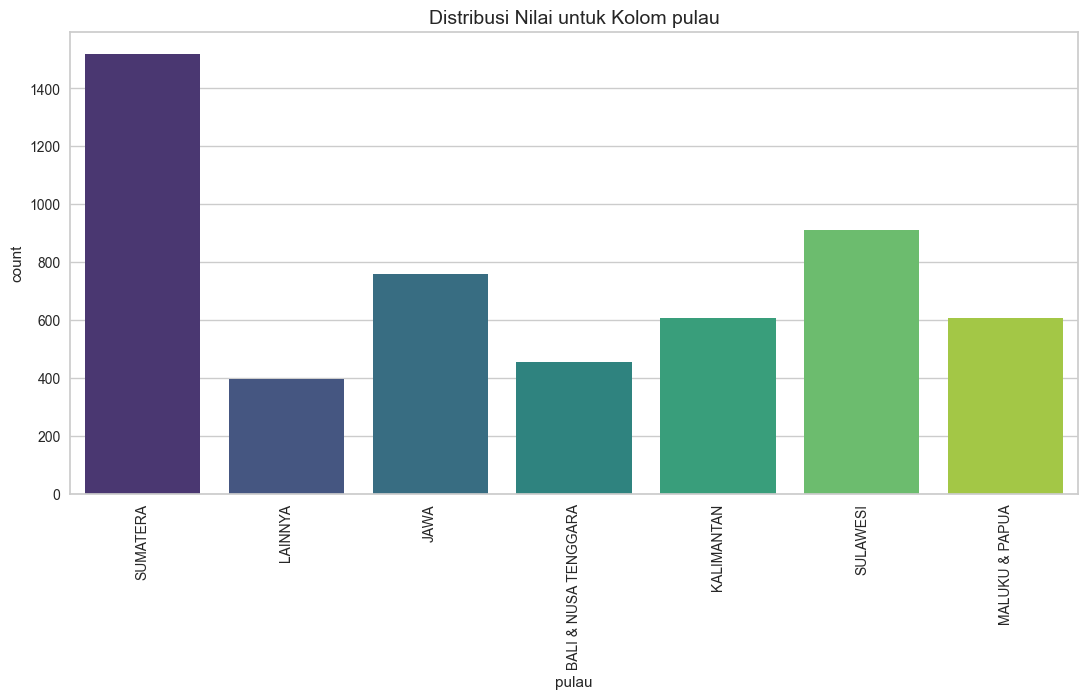

In [118]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='pulau', hue='pulau', legend=False, palette="viridis")
plt.title(f"Distribusi Nilai untuk Kolom pulau", fontsize=14)
plt.xticks(rotation=90)
plt.show()

**Insight Analisis:**  
- Pulau dengan jumlah data tertinggi menunjukkan wilayah dengan lebih banyak catatan terkait garis kemiskinan.  
- Distribusi data tidak merata, beberapa pulau memiliki lebih banyak sampel dibandingkan lainnya, yang bisa mencerminkan perbedaan dalam jumlah provinsi atau tingkat perhatian dalam pencatatan data.  
- Ketimpangan distribusi ini perlu diperhatikan saat analisis lebih lanjut, karena dapat memengaruhi hasil clustering atau model prediksi.

#### 6. Encoding Data Kategorikal

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5261 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jenis    5261 non-null   object 
 1   daerah   5261 non-null   object 
 2   tahun    5261 non-null   int64  
 3   periode  5261 non-null   object 
 4   gk       5261 non-null   float64
 5   pulau    5261 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 287.7+ KB


In [120]:
ordinal_features = ['tahun', 'periode']
nominal_features = ['jenis', 'daerah', 'pulau']

ordinal_enc = LabelEncoder()
for col in ordinal_features:
    df[col] = ordinal_enc.fit_transform(df[col])

onehot_enc = OneHotEncoder(sparse_output=False)
nominal_encoded = onehot_enc.fit_transform(df[nominal_features])

nominal_encoded_df = pd.DataFrame(
    nominal_encoded,
    columns=onehot_enc.get_feature_names_out(nominal_features)
)

df_encoded = pd.concat([df.drop(columns=nominal_features), nominal_encoded_df], axis=1)

**Insight Analisis:**  
- Kolom tahun dan periode diubah ke angka karena ada urutan yang jelas.  
- Kolom jenis, daerah, dan pulau diubah ke format biner (0/1) menggunakan One-Hot Encoding agar model bisa memahami kategori tanpa menganggap ada hubungan urutan.  
- Data jadi lebih siap untuk pemrosesan mesin, tapi jumlah kolom bertambah karena metode One-Hot Encoding.

In [121]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, 0 to 5255
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tahun                       5261 non-null   float64
 1   periode                     5261 non-null   float64
 2   gk                          5261 non-null   float64
 3   jenis_MAKANAN               5261 non-null   float64
 4   jenis_NONMAKANAN            5261 non-null   float64
 5   jenis_TOTAL                 5261 non-null   float64
 6   daerah_PERDESAAN            5261 non-null   float64
 7   daerah_PERDESAANPERKOTAAN   5261 non-null   float64
 8   daerah_PERKOTAAN            5261 non-null   float64
 9   pulau_BALI & NUSA TENGGARA  5261 non-null   float64
 10  pulau_JAWA                  5261 non-null   float64
 11  pulau_KALIMANTAN            5261 non-null   float64
 12  pulau_LAINNYA               5261 non-null   float64
 13  pulau_MALUKU & PAPUA        5261 non-n

In [122]:
df_encoded.describe()

,tahun,periode,gk,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,pulau_BALI & NUSA TENGGARA,pulau_JAWA,pulau_KALIMANTAN,pulau_LAINNYA,pulau_MALUKU & PAPUA,pulau_SULAWESI,pulau_SUMATERA
count,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000
mean,5.244250,0.500095,0.309776,0.316290,0.316290,0.367421,0.335488,0.319331,0.345182,0.086676,0.144459,0.115567,0.075461,0.115567,0.173351,0.288918
std,2.491855,0.500048,0.191896,0.465072,0.465072,0.482148,0.472206,0.466262,0.475473,0.281386,0.351588,0.319736,0.264159,0.319736,0.378586,0.453303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.116602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1.000000,0.321168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,1.000000,0.438718,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
df_encoded.head()

,tahun,periode,gk,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,pulau_BALI & NUSA TENGGARA,pulau_JAWA,pulau_KALIMANTAN,pulau_LAINNYA,pulau_MALUKU & PAPUA,pulau_SULAWESI,pulau_SUMATERA
0,2.0,0.0,0.297393,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,0.307622,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,0.0,0.312614,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,1.0,0.329022,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,0.0,0.301982,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [124]:
scaler = MinMaxScaler()
df_encoded['tahun'] = scaler.fit_transform(df_encoded[['tahun']])

- MinMaxScaler digunakan untuk menormalisasi kolom tahun agar nilainya berada dalam rentang 0 hingga 1.  
- Tujuannya adalah memastikan skala data seragam, sehingga model tidak memberikan bobot lebih besar pada fitur dengan nilai yang lebih besar.  
- Menghindari bias dalam analisis karena perbedaan skala antar fitur.

In [125]:
df_encoded.describe()

,tahun,periode,gk,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,pulau_BALI & NUSA TENGGARA,pulau_JAWA,pulau_KALIMANTAN,pulau_LAINNYA,pulau_MALUKU & PAPUA,pulau_SULAWESI,pulau_SUMATERA
count,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000
mean,0.582694,0.500095,0.309776,0.316290,0.316290,0.367421,0.335488,0.319331,0.345182,0.086676,0.144459,0.115567,0.075461,0.115567,0.173351,0.288918
std,0.276873,0.500048,0.191896,0.465072,0.465072,0.482148,0.472206,0.466262,0.475473,0.281386,0.351588,0.319736,0.264159,0.319736,0.378586,0.453303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.116602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.555556,1.000000,0.321168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.777778,1.000000,0.438718,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
df_encoded.isna().sum()

tahun                         195
periode                       195
gk                            195
jenis_MAKANAN                 195
jenis_NONMAKANAN              195
jenis_TOTAL                   195
daerah_PERDESAAN              195
daerah_PERDESAANPERKOTAAN     195
daerah_PERKOTAAN              195
pulau_BALI & NUSA TENGGARA    195
pulau_JAWA                    195
pulau_KALIMANTAN              195
pulau_LAINNYA                 195
pulau_MALUKU & PAPUA          195
pulau_SULAWESI                195
pulau_SUMATERA                195
dtype: int64

- terdapat miss value, kita akan menghilangkannya

In [127]:
df_encoded = df_encoded.dropna()

In [128]:
df_encoded.isna().sum()

tahun                         0
periode                       0
gk                            0
jenis_MAKANAN                 0
jenis_NONMAKANAN              0
jenis_TOTAL                   0
daerah_PERDESAAN              0
daerah_PERDESAANPERKOTAAN     0
daerah_PERKOTAAN              0
pulau_BALI & NUSA TENGGARA    0
pulau_JAWA                    0
pulau_KALIMANTAN              0
pulau_LAINNYA                 0
pulau_MALUKU & PAPUA          0
pulau_SULAWESI                0
pulau_SUMATERA                0
dtype: int64

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [129]:
df_clustered = df_encoded.copy()
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5066 entries, 0 to 5260
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tahun                       5066 non-null   float64
 1   periode                     5066 non-null   float64
 2   gk                          5066 non-null   float64
 3   jenis_MAKANAN               5066 non-null   float64
 4   jenis_NONMAKANAN            5066 non-null   float64
 5   jenis_TOTAL                 5066 non-null   float64
 6   daerah_PERDESAAN            5066 non-null   float64
 7   daerah_PERDESAANPERKOTAAN   5066 non-null   float64
 8   daerah_PERKOTAAN            5066 non-null   float64
 9   pulau_BALI & NUSA TENGGARA  5066 non-null   float64
 10  pulau_JAWA                  5066 non-null   float64
 11  pulau_KALIMANTAN            5066 non-null   float64
 12  pulau_LAINNYA               5066 non-null   float64
 13  pulau_MALUKU & PAPUA        5066 non-n

In [130]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(df_clustered)
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(df_clustered, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.16093053524203008


- Nilai 0.16 cukup rendah, menunjukkan bahwa klaster yang terbentuk belum optimal. tapi ini awal yang baik kita akan melakukan evaluasi

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

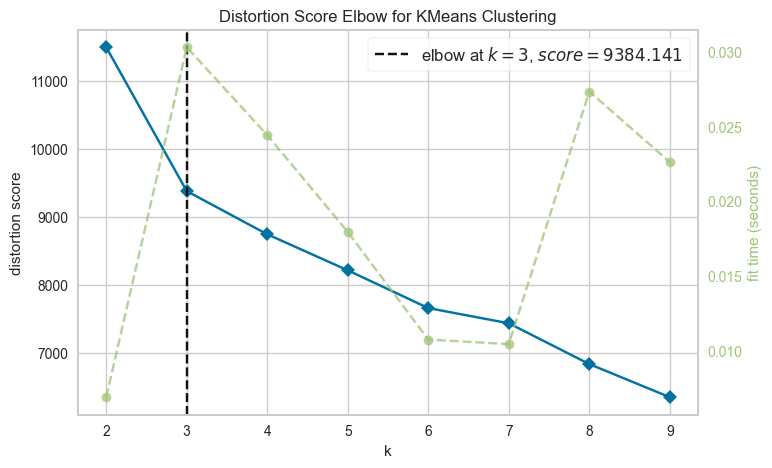

In [131]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='distortion', locate_elbow=True)
visualizer.fit(df_clustered)
visualizer.show()

optimal_k = visualizer.elbow_value_

In [132]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit_predict(df_clustered)
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(df_clustered, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.2051851341726063


- Peningkatan skor dari 0.16 ke 0.21 menunjukkan klaster yang lebih baik dibanding sebelumnya (5 klaster).
- Namun, skor masih rendah (<0.5), yang berarti klaster masih kurang terpisah dengan baik. maka kita sebaiknya memilih feature

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [133]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# 1. Lakukan Clustering Awal
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(df_clustered)

# 2. Gunakan SelectKBest untuk memilih fitur terbaik
k_best = SelectKBest(score_func=mutual_info_classif, k=4)  # Pilih 4 fitur terbaik
df_selected = k_best.fit_transform(df_clustered.drop(columns=['gk']), cluster_labels)  # Drop "gk" sementara

# 3. Dapatkan Nama Fitur yang Dipilih
selected_features = df_clustered.drop(columns=['gk']).columns[k_best.get_support()]
selected_features = list(selected_features) + ['gk']  # Pastikan "gk" tetap ada

# 4. Buat DataFrame Baru dengan Fitur yang Dipilih
df_clustered_selected = pd.DataFrame(df_selected, columns=selected_features[:-1])  # Tanpa "gk" dulu
df_clustered_selected['gk'] = df_clustered['gk'].values  # Tambahkan "gk" kembali

# 5. Cek hasil fitur yang dipilih
print("Fitur Terpilih:", selected_features)

Fitur Terpilih: ['jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL', 'daerah_PERKOTAAN', 'gk']


- Feature selection dilakukan untuk memilih 4 fitur terbaik menggunakan SelectKBest (Mutual Information) agar model clustering lebih akurat. Fitur "gk" sementara dihapus, lalu ditambahkan kembali setelah pemilihan fitur. Hasilnya, dataset lebih ringkas dan fokus pada fitur yang paling berpengaruh.

In [134]:
df_clustered_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   jenis_MAKANAN     5066 non-null   float64
 1   jenis_NONMAKANAN  5066 non-null   float64
 2   jenis_TOTAL       5066 non-null   float64
 3   daerah_PERKOTAAN  5066 non-null   float64
 4   gk                5066 non-null   float64
dtypes: float64(5)
memory usage: 198.0 KB


In [135]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit_predict(df_clustered_selected)
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(df_clustered_selected, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.6333702603867646


- Setelah feature selection, Silhouette Score meningkat menjadi 0.633, menunjukkan bahwa clustering lebih optimal dibanding sebelumnya. Ini berarti fitur yang dipilih lebih relevan dalam membentuk kelompok yang jelas.
- selanjutnya kita menggunakan elbow method utk memilih cluster terbaik

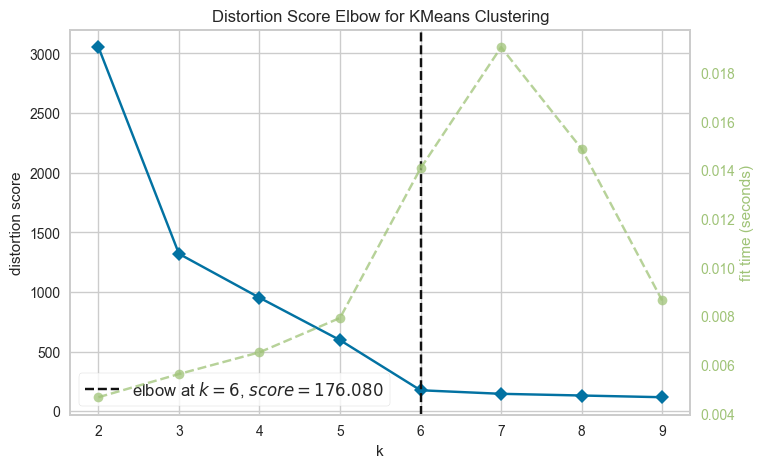

In [136]:
plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='distortion', locate_elbow=True)
visualizer.fit(df_clustered_selected)
visualizer.show()

optimal_k = visualizer.elbow_value_

In [137]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(df_clustered_selected)

kmeans_silhouette = silhouette_score(df_clustered_selected, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.7978973177271234


- Setelah menggunakan Elbow Method, Silhouette Score meningkat menjadi 0.798, menunjukkan bahwa jumlah cluster yang dipilih lebih optimal, menghasilkan pemisahan kelompok yang lebih jelas dan akurat.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

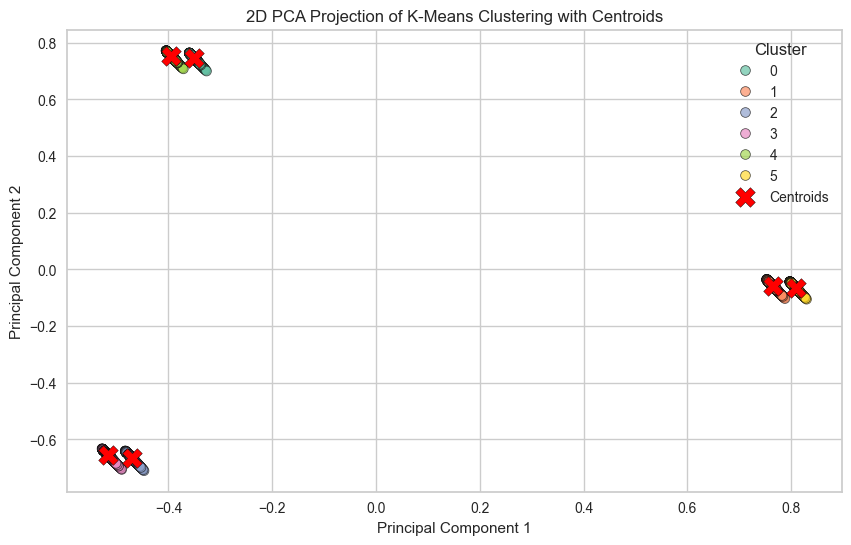

In [138]:
# 1. Reduksi Dimensi ke 2D Menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustered_selected.values)  # <- Gunakan .values agar tidak menyimpan nama fitur

# 2. Transformasikan Centroid ke PCA Space
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Sekarang cocok dengan format yang diharapkan

# 3. Konversi ke DataFrame untuk Visualisasi
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_labels

# 4. Plot PCA Projection dengan Centroid
plt.figure(figsize=(10, 6))

# Scatter plot untuk data poin
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=df_pca, alpha=0.7, edgecolors='k')

# Scatter plot untuk centroid
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids', edgecolors='black')

# 5. Tambahkan Judul & Label
plt.title("2D PCA Projection of K-Means Clustering with Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

- Visualisasi PCA menunjukkan distribusi cluster hasil K-Means dalam dua dimensi utama. Setiap warna mewakili satu cluster, sementara centroid (X merah) menunjukkan pusat tiap kelompok. Data terlihat tersebar dengan baik, menandakan pemisahan yang cukup jelas antar cluster, yang diperkuat oleh silhouette score tinggi sebelumnya.

In [139]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [140]:
original_df.describe()

,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


In [141]:
scaler = MinMaxScaler()
original_df['gk'] = scaler.fit_transform(original_df[['gk']])

Normalisasi menggunakan MinMaxScaler telah - mengubah nilai garis kemiskinan (gk) ke rentang 0-1, sehingga memudahkan perbandingan dan meningkatkan performa algoritma berbasis jarak seperti K-Means.

In [142]:
original_df.describe()

,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,0.309776
std,2.577159,0.191896
min,2013.000000,0.000000
25%,2016.000000,0.116602
50%,2018.000000,0.321168
75%,2020.000000,0.438718
max,2022.000000,1.000000


In [143]:
ordinal_features = ['tahun', 'periode']
nominal_features = ['jenis', 'daerah', 'pulau']

ordinal_enc = LabelEncoder()
for col in ordinal_features:
    df[col] = ordinal_enc.fit_transform(df[col])

onehot_enc = OneHotEncoder(sparse_output=False)
nominal_encoded = onehot_enc.fit_transform(df[nominal_features])

nominal_encoded_df = pd.DataFrame(
    nominal_encoded,
    columns=onehot_enc.get_feature_names_out(nominal_features)
)

df_encoded = pd.concat([df.drop(columns=nominal_features), nominal_encoded_df], axis=1)

Proses ini mengonversi fitur kategori menjadi numerik:  
- Fitur ordinal (tahun, periode) dikodekan dengan LabelEncoder untuk mempertahankan urutan.  
- Fitur nominal (jenis, daerah, pulau) dikodekan dengan OneHotEncoder agar setiap kategori direpresentasikan sebagai vektor biner.  
- Data hasil encoding digabung kembali ke df_encoded untuk digunakan dalam analisis lebih lanjut.

In [144]:
df_encoded = df_encoded.dropna()

Baris yang memiliki missing values dihapus dari dataset. Ini memastikan data bersih sebelum analisis atau pemodelan lebih lanjut, tetapi juga dapat menyebabkan hilangnya informasi jika terlalu banyak data yang dibuang.

In [145]:
df_encoded = df_encoded.copy()  # Buat salinan eksplisit
df_encoded['Cluster'] = kmeans_labels

Kolom Cluster ditambahkan ke dataset df_encoded, mengaitkan setiap data dengan label cluster hasil K-Means. 

In [146]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5066 entries, 0 to 5260
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tahun                       5066 non-null   float64
 1   periode                     5066 non-null   float64
 2   gk                          5066 non-null   float64
 3   jenis_MAKANAN               5066 non-null   float64
 4   jenis_NONMAKANAN            5066 non-null   float64
 5   jenis_TOTAL                 5066 non-null   float64
 6   daerah_PERDESAAN            5066 non-null   float64
 7   daerah_PERDESAANPERKOTAAN   5066 non-null   float64
 8   daerah_PERKOTAAN            5066 non-null   float64
 9   pulau_BALI & NUSA TENGGARA  5066 non-null   float64
 10  pulau_JAWA                  5066 non-null   float64
 11  pulau_KALIMANTAN            5066 non-null   float64
 12  pulau_LAINNYA               5066 non-null   float64
 13  pulau_MALUKU & PAPUA        5066 non-n

In [147]:
columns_to_drop = [
    'daerah_PERDESAAN',
    'daerah_PERDESAANPERKOTAAN',
    'pulau_BALI & NUSA TENGGARA',
    'pulau_JAWA',
    'pulau_KALIMANTAN',
    'pulau_LAINNYA',
    'pulau_MALUKU & PAPUA',
    'pulau_SULAWESI',
    'pulau_SUMATERA',
    'tahun',
    'periode'
]

df_selected = df_encoded.drop(columns=columns_to_drop, axis=1)

dihapus karena tidak akan menjadi fokus utama cluster

In [148]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5066 entries, 0 to 5260
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gk                5066 non-null   float64
 1   jenis_MAKANAN     5066 non-null   float64
 2   jenis_NONMAKANAN  5066 non-null   float64
 3   jenis_TOTAL       5066 non-null   float64
 4   daerah_PERKOTAAN  5066 non-null   float64
 5   Cluster           5066 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 257.3 KB


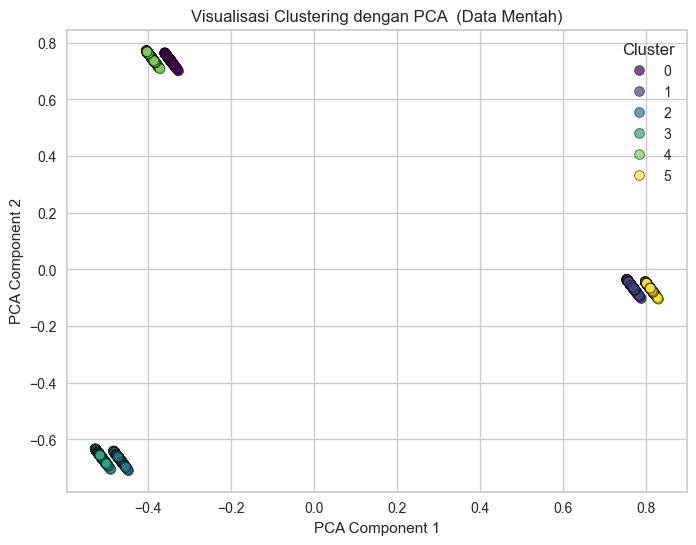

In [149]:
#  Pastikan hanya mengambil fitur numerik (tanpa kolom Cluster)
df_features = df_selected.drop(columns=["Cluster"])  

#  Reduksi Dimensi dengan PCA
pca = PCA(n_components=2)
df_pca_values = pca.fit_transform(df_features)  # Transformasi fitur numerik

#  Konversi ke DataFrame
df_pca = pd.DataFrame(df_pca_values, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df_selected["Cluster"].values  # Pastikan Cluster tetap ada
  

#  Visualisasi
plt.figure(figsize=(8, 6))

# Scatter plot untuk data berdasarkan cluster
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", alpha=0.7, edgecolor="k")

# Tambahkan label dan judul
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi Clustering dengan PCA  (Data Mentah)")
plt.legend(title="Cluster")
plt.show()

1. Cluster terlihat jelas → Pemisahan antar kelompok cukup baik.  
2. PCA sukses mereduksi dimensi → Pola tetap terlihat meski hanya 2D.  


In [150]:
cluster_distribution = df_pca['Cluster'].value_counts()
print(cluster_distribution)

Cluster
1    1177
3    1088
4    1056
5     653
2     556
0     536
Name: count, dtype: int64


Distribusi cluster menunjukkan jumlah data dalam setiap kelompok. Jika ada ketidakseimbangan yang signifikan, bisa jadi beberapa cluster kurang representatif atau perlu disesuaikan jumlahnya. Jika distribusi relatif merata, maka clustering sudah cukup baik dalam mengelompokkan data.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [151]:
df_normalized = df_encoded.copy()

In [152]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5066 entries, 0 to 5260
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tahun                       5066 non-null   float64
 1   periode                     5066 non-null   float64
 2   gk                          5066 non-null   float64
 3   jenis_MAKANAN               5066 non-null   float64
 4   jenis_NONMAKANAN            5066 non-null   float64
 5   jenis_TOTAL                 5066 non-null   float64
 6   daerah_PERDESAAN            5066 non-null   float64
 7   daerah_PERDESAANPERKOTAAN   5066 non-null   float64
 8   daerah_PERKOTAAN            5066 non-null   float64
 9   pulau_BALI & NUSA TENGGARA  5066 non-null   float64
 10  pulau_JAWA                  5066 non-null   float64
 11  pulau_KALIMANTAN            5066 non-null   float64
 12  pulau_LAINNYA               5066 non-null   float64
 13  pulau_MALUKU & PAPUA        5066 non-n

In [153]:
columns_to_drop = [
    'pulau_BALI & NUSA TENGGARA',
    'pulau_JAWA',
    'pulau_KALIMANTAN',
    'pulau_LAINNYA',
    'pulau_MALUKU & PAPUA',
    'pulau_SULAWESI',
    'pulau_SUMATERA',
    'tahun',
    'periode'
]
#    'daerah_PERDESAAN',
#    'daerah_PERDESAANPERKOTAAN',
df_normalized = df_normalized.drop(columns=columns_to_drop, axis=1)

kita telah menghapus fitur yang berkaitan dengan **lokasi geografis (pulau)** dan **waktu (tahun & periode)** dari dataset.   


In [154]:
df_normalized.head()

,gk,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,Cluster
0,0.297393,1.0,0.0,0.0,0.0,0.0,1.0,2
1,0.307622,1.0,0.0,0.0,0.0,0.0,1.0,2
2,0.312614,1.0,0.0,0.0,0.0,0.0,1.0,2
3,0.329022,1.0,0.0,0.0,0.0,0.0,1.0,2
4,0.301982,1.0,0.0,0.0,1.0,0.0,0.0,3


In [155]:
df_normalized['daerah'] = df_normalized[['daerah_PERDESAAN', 'daerah_PERKOTAAN', 'daerah_PERDESAANPERKOTAAN']].idxmax(axis=1)
df_normalized['daerah'] = df_normalized['daerah'].str.replace('daerah_', '')

 mengonversi fitur daerah menjadi satu kategori berdasarkan nilai tertinggi, lalu menghapus prefix "daerah_". Ini menyederhanakan variabel kategori tanpa kehilangan informasi.

In [156]:
df_normalized['jenis'] = df_normalized[['jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL']].idxmax(axis=1)
df_normalized['jenis'] = df_normalized['jenis'].str.replace('jenis_', '')

mengubah fitur jenis menjadi satu kategori berdasarkan nilai tertinggi, lalu menghapus prefix "jenis_". Ini menyederhanakan analisis tanpa kehilangan informasi.

In [157]:
df_normalized = df_normalized.drop(columns=['jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL', 'daerah_PERDESAAN', 'daerah_PERKOTAAN', 'daerah_PERDESAANPERKOTAAN'])
df_normalized.head()

,gk,Cluster,daerah,jenis
0,0.297393,2,PERKOTAAN,MAKANAN
1,0.307622,2,PERKOTAAN,MAKANAN
2,0.312614,2,PERKOTAAN,MAKANAN
3,0.329022,2,PERKOTAAN,MAKANAN
4,0.301982,3,PERDESAAN,MAKANAN


Dataset telah dinormalisasi dan diklasifikasikan berdasarkan tiga fitur utama: **gk** (nilai numerik), **Cluster** (kelompok tertentu), **daerah** (kategori lokasi: PERDESAAN/PERKOTAAN), dan **jenis** (kategori konsumsi: MAKANAN/NONMAKANAN).  
  
Struktur ini siap digunakan untuk analisis lebih lanjut atau model klasifikasi.

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

##### Menyiapkan Data untuk Analisis Karakteristik Cluster

In [158]:
df_normalized[['gk']] = scaler.inverse_transform(df_normalized[['gk']])

##### Mengurutkan Kolom yang Tidak Digunakan dalam Analisis

In [159]:
columns = ['gk', 'jenis', 'daerah', 'Cluster']
df_normalized = df_normalized[columns]

df_normalized.head()

,gk,jenis,daerah,Cluster
0,293697.0,MAKANAN,PERKOTAAN,2
1,302128.0,MAKANAN,PERKOTAAN,2
2,306243.0,MAKANAN,PERKOTAAN,2
3,319768.0,MAKANAN,PERKOTAAN,2
4,297479.0,MAKANAN,PERDESAAN,3


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

##### baca distribusi cluster kolom ada berapa

In [160]:
frekuensi = df_normalized.groupby('Cluster').size()
frekuensi

Cluster
0     536
1    1177
2     556
3    1088
4    1056
5     653
dtype: int64

##### Analisis Rata-rata, Nilai Minimum, dan Maksimum dari gk dalam Setiap Cluster

In [161]:
df_normalized.groupby('Cluster')['gk'].agg(['mean', 'min', 'max']).round().T

Cluster,0,1,2,3,4,5
mean,257625.0,337117.0,333941.0,318867.0,248126.0,311515.0
min,49612.0,73626.0,50261.0,48561.0,52529.0,72832.0
max,773370.0,834774.0,836425.0,872843.0,773370.0,772112.0


##### mnganalisis Proporsi Jenis Pengeluaran dan Wilayah dalam Setiap Cluster

In [162]:
frekuensi = df_normalized.groupby('Cluster')[['jenis', 'daerah']].apply(lambda x: x.value_counts()).reset_index()
frekuensi.columns = ['Cluster', 'Jenis', 'Daerah', 'Frekuensi']
frekuensi['Presentase (%)'] = (frekuensi['Frekuensi'] / frekuensi.groupby('Cluster')['Frekuensi'].transform('sum')) * 100

frekuensi

,Cluster,Jenis,Daerah,Frekuensi,Presentase (%)
0,0,NONMAKANAN,PERKOTAAN,536,100.000000
1,1,TOTAL,PERDESAAN,645,54.800340
2,1,TOTAL,PERDESAANPERKOTAAN,532,45.199660
3,2,MAKANAN,PERKOTAAN,556,100.000000
4,3,MAKANAN,PERDESAANPERKOTAAN,556,51.102941
5,3,MAKANAN,PERDESAAN,532,48.897059
6,4,NONMAKANAN,PERDESAANPERKOTAAN,540,51.136364
7,4,NONMAKANAN,PERDESAAN,516,48.863636
8,5,TOTAL,PERKOTAAN,653,100.000000



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Pengeluaran Konsumsi (gk):** 257.625 
- **Rentang garis kemiskinan:** 49.612 – 773.370
- **Jenis Pengeluaran Dominan** : 100% Non-Makanan
- **Wilayah Dominan:**: 100% Perkotaan
- **Analisis:** Cluster ini sepenuhnya terdiri dari individu dari daerah perkotaan yang mengalokasikan pengeluaran mereka pada kebutuhan non-makanan seperti transportasi, pendidikan, dan hiburan. Dengan rata-rata pengeluaran yang relatif lebih rendah dibandingkan beberapa cluster lainnya, kelompok ini kemungkinan besar mencerminkan masyarakat perkotaan dengan tingkat konsumsi yang moderat dalam aspek non-makanan.

## Cluster 1:
- **Rata-rata Pengeluaran Konsumsi (gk):** 337.117
- **Rentang garis kemiskinan:**  73.626 – 834.774
- **Jenis Pengeluaran Dominan** : 100% Total Konsumsi
- **Wilayah Dominan:**: 54.8% Perdesaan, 45.2% Perdesaan-Perkotaan
- **Analisis:** Cluster ini terdiri dari masyarakat yang berada di daerah perdesaan dan perdesaan-perkotaan dengan pengeluaran total yang lebih tinggi dibandingkan Cluster 0. Kombinasi konsumsi makanan dan non-makanan dalam total pengeluaran menunjukkan keseimbangan dalam pola konsumsi mereka.


## Cluster 2:
- **Rata-rata Pengeluaran Konsumsi (gk):**  333.941
- **Rentang garis kemiskinan:**  50.261 – 836.425
- **Jenis Pengeluaran Dominan** : 100% Makanan
- **Wilayah Dominan:**: 100% Perkotaan
- **Analisis:** Kelompok ini memiliki pola konsumsi yang sangat terfokus pada makanan. Seluruh anggotanya berasal dari daerah perkotaan, menunjukkan bahwa mereka cenderung mengalokasikan sebagian besar pengeluaran mereka untuk kebutuhan pangan dibandingkan dengan kategori lainnya.

## Cluster 3:
- **Rata-rata Pengeluaran Konsumsi (gk):**  318.867
- **Rentang garis kemiskinan:**   48.561 – 872.843
- **Jenis Pengeluaran Dominan** : 100% Makanan
- **Wilayah Dominan:**:51.1% Perdesaan-Perkotaan, 48.9% Perdesaan
- **Analisis:** Cluster ini mirip dengan Cluster 2 dalam hal dominasi pengeluaran untuk makanan. Namun, distribusi wilayahnya lebih merata antara perdesaan dan daerah perdesaan-perkotaan. Hal ini menunjukkan bahwa kebutuhan makanan masih menjadi prioritas utama di wilayah-wilayah ini.

## Cluster 4:
- **Rata-rata Pengeluaran Konsumsi (gk):**  248.126
- **Rentang garis kemiskinan:**   52.529 – 773.370
- **Jenis Pengeluaran Dominan** : 100% Non-Makanan
- **Wilayah Dominan:**:51.1% Perdesaan-Perkotaan, 48.9% Perdesaan
Analisis:
- **Analisis:** Berbeda dengan Cluster 3 yang lebih fokus pada makanan, kelompok ini memiliki pola konsumsi yang berorientasi pada kebutuhan non-makanan. Pengeluaran non-makanan yang cukup besar di daerah perdesaan dan perdesaan-perkotaan bisa mencerminkan investasi pada sektor pendidikan, transportasi, atau barang sekunder lainnya.

## Cluster 5:
- **Rata-rata Pengeluaran Konsumsi (gk):**  311.515
- **Rentang garis kemiskinan:**   72.832 – 772.112
- **Jenis Pengeluaran Dominan** : 100% Total Konsumsi
- **Wilayah Dominan:**:100% perkotaan
- **Analisis:** Cluster ini menunjukkan masyarakat perkotaan dengan pengeluaran total yang lebih tinggi dibandingkan Cluster 0. Mereka memiliki keseimbangan dalam pengeluaran makanan dan non-makanan, mencerminkan daya beli yang lebih baik serta pola konsumsi yang lebih bervariasi.

In [166]:
df_normalized.to_csv('garis_kemiskinan_clustering.csv')